Does the All-Star break hurt or improve a NBA player's performance ?

Analysis of this problem gives insight on player's performance after All-Star break and gives insight on a player's ability to help a team make a late push for the playoffs.

Tech Stack: pandas/numpy (dataframe), matplotlib/plotly (data visuals), nba_api (data source), beautifulSoup/Selenium (web scraping), excel/notes (data file), request (online)

Data Sources: basketball-refernce, csv file generated from basketball-reference.com 

 As a user I should be able to evaulate whether a NBA player's performance improved or declined after All-Star break by total points, rebounds, assist and turnovers (player efficency) by comparing to before All-Star break stats.
 

Importing libraries that will be used for this project below 

In [753]:

import matplotlib
import pandas as pd 
import numpy as np 
import requests 
from bs4 import BeautifulSoup
import matplotlib.pylab as plt 
%matplotlib inline
import datetime
import seaborn as sns

Retrieve the data from URL and convert data from url into a csv file 
The data sources used are Kevin Durant's rookie and sophmore year stats for 

In [754]:
#Get Data From Source 

def get_data_to_csv(year):
    url = f"https://www.basketball-reference.com/players/d/duranke01/gamelog/{year}"
    results = requests.get(url)
    stats_08 = pd.read_html(url, header=0)
    data = stats_08[7]
    csv = data.to_csv(f'KDurant{year}.csv', index=False)
    return csv 
get_data_to_csv(2008)
get_data_to_csv(2009)
# get_data_to_csv(2010)
# get_data_to_csv(2011)

Converts csv file into a data frame so data cleansing can begin 
    -Convert colunn data types as needed for analysis 
    -Drop columns that are not useful for analysis 
    -Reindex 
    -Create new columns that will be needed later for analysis 

In [755]:
def get_data(year):
    url = f"https://www.basketball-reference.com/players/d/duranke01/gamelog/{year}"
    results = requests.get(url)
    stats_08 = pd.read_html(url, header=0)
    data = stats_08[7]
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    
    #Data Cleaning 

    # print(data.dtypes)
    data.drop(columns=['Unnamed: 5', 'Unnamed: 7','Age'], inplace=True)
    
    data['FG'] = pd.to_numeric(data['FG'],  errors='coerce')
    data['FGA'] = pd.to_numeric(data['FGA'],  errors='coerce')
    data['3P'] = pd.to_numeric(data['3P'],  errors='coerce')
    data['3PA'] = pd.to_numeric(data['3P'],  errors='coerce')
    data['FT'] = pd.to_numeric(data['FT'], errors='coerce')
    data['FTA'] = pd.to_numeric(data['FTA'], errors='coerce')
    data['TRB'] = pd.to_numeric(data['TRB'], errors='coerce')
    data['AST'] = pd.to_numeric(data['AST'], errors='coerce')
    data['STL'] = pd.to_numeric(data['STL'], errors='coerce')
    data['BLK'] = pd.to_numeric(data['BLK'], errors='coerce')
    data['TOV'] = pd.to_numeric(data['TOV'], errors='coerce')
    data['PTS'] = pd.to_numeric(data['PTS'], errors='coerce')
    data['PF'] =  pd.to_numeric(data['PF'],  errors='coerce')
    data['ORB'] = pd.to_numeric(data['ORB'],  errors='coerce')
    data['DRB'] = pd.to_numeric(data['DRB'],  errors='coerce')
    # # data[['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PF', 'ORB', 'DRB']] 
    # print(data.dtypes)
    blank = data[data['PTS'].isnull()].index
    data.drop(blank, inplace=True)
    empty_rows = data[data['MP'] == 'MP'].index
    data.drop(empty_rows, inplace=True)
    data.set_index('Rk', drop=True, inplace=True)
    data.drop(columns=['3P%', 'FT%', 'GmSc', 'Tm', 'Opp'], inplace=True)
   
    #Create a new column within the data of field goals missed and free throws missed 
    FT_Miss = data['FTA'] - data['FT']
    FG_Miss = data['FGA'] - data['FG'] 
    data['FTM'] = FT_Miss
    data['FGM'] = FG_Miss
    return data
get_data(2008)
# get_data(2009)
# get_data(2010)
# get_data(2011)

,G,Date,GS,MP,FG,FGA,FG%,3P,3PA,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,FTM,FGM
Rk,,,,,,,,,,,,,,,,,,,,,
1,1,2007-10-31,1,31:34,7.0,22.0,.318,2.0,2.0,2.0,...,5.0,1.0,3.0,1.0,2.0,3.0,18.0,-8,2.0,15.0
2,2,2007-11-01,1,39:19,11.0,23.0,.478,2.0,2.0,3.0,...,5.0,1.0,0.0,1.0,6.0,2.0,27.0,-3,1.0,12.0
3,3,2007-11-04,1,37:17,10.0,19.0,.526,3.0,3.0,1.0,...,8.0,5.0,0.0,1.0,1.0,2.0,24.0,-18,1.0,9.0
4,4,2007-11-06,1,33:38,11.0,22.0,.500,3.0,3.0,2.0,...,7.0,4.0,1.0,0.0,6.0,2.0,27.0,-16,1.0,11.0
5,5,2007-11-07,1,31:38,3.0,17.0,.176,1.0,1.0,10.0,...,2.0,1.0,1.0,0.0,2.0,2.0,17.0,-9,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,76,2008-04-08,1,37:09,6.0,16.0,.375,0.0,0.0,4.0,...,6.0,3.0,0.0,1.0,0.0,0.0,16.0,-20,1.0,10.0
79,77,2008-04-09,1,38:41,10.0,23.0,.435,1.0,1.0,5.0,...,3.0,4.0,4.0,0.0,2.0,1.0,26.0,-8,2.0,13.0
80,78,2008-04-11,1,34:40,9.0,19.0,.474,0.0,0.0,2.0,...,6.0,3.0,0.0,1.0,0.0,1.0,20.0,-18,1.0,10.0


In [756]:
get_data(2009)

,G,Date,GS,MP,FG,FGA,FG%,3P,3PA,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,FTM,FGM
Rk,,,,,,,,,,,,,,,,,,,,,
1,1,2008-10-29,1,33:37,5.0,14.0,.357,0.0,0.0,2.0,...,3.0,2.0,0.0,0.0,4.0,4.0,12.0,-14,0.0,9.0
2,2,2008-11-01,1,34:59,11.0,20.0,.550,0.0,0.0,4.0,...,5.0,2.0,4.0,0.0,3.0,2.0,26.0,-1,0.0,9.0
3,3,2008-11-02,1,37:30,7.0,21.0,.333,0.0,0.0,4.0,...,5.0,0.0,0.0,1.0,1.0,0.0,18.0,-2,1.0,14.0
4,4,2008-11-05,1,32:20,6.0,15.0,.400,0.0,0.0,5.0,...,2.0,2.0,1.0,1.0,3.0,0.0,17.0,-1,1.0,9.0
5,5,2008-11-07,1,33:50,9.0,15.0,.600,1.0,1.0,5.0,...,5.0,3.0,1.0,0.0,2.0,4.0,24.0,-7,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,70,2009-04-08,1,40:46,9.0,20.0,.450,2.0,2.0,11.0,...,7.0,0.0,0.0,1.0,1.0,3.0,31.0,-12,1.0,11.0
79,71,2009-04-10,1,44:28,9.0,24.0,.375,1.0,1.0,1.0,...,10.0,1.0,3.0,2.0,4.0,5.0,20.0,+1,2.0,15.0
80,72,2009-04-11,1,28:11,6.0,13.0,.462,3.0,3.0,4.0,...,5.0,2.0,3.0,0.0,4.0,3.0,19.0,-16,0.0,7.0


Calculation Method

NBA Player Eff == (Pts + Reb + Ast + Stl + Blk - Missed FG - Missed Ft - To) / GP or minutes for single game 
FGM * 85.910 + Stl(53.897) + 3PTM(51.757) + FTM (46.845) + Blks(39.190) + OFB(39.19) + Ast(34.677) + DRB(14.707) - F(20.091) - FT_Miss(20.091) - FG_Miss(39.190) - T0(53.897)

In [757]:
data = get_data(2008)
data09 = get_data(2009)
# data10 = get_data(2010)
# data11 = get_data(2011)

#Formula for effiency 
EFF = ((((data['FG']*85.910)+ (data['STL']*53.897) + (data['3P']*51.757) + (data['FT']*46.845)+ (data['BLK']*39.190) + (data['ORB']*39.19) + (data['AST']*34.677) + (data['DRB']*14.707)) - ((data['PF']*20.091) - (data['FTM']*20.091) - (data['FGM']*39.190) - (data['TOV']*53.897)))) / 72
raw_eff = ((((data['FG'])+ (data['STL']) + (data['3P']) + (data['FT'])+ (data['BLK']) + (data['ORB']) + (data['AST']) + (data['DRB'])) - ((data['PF']) - (data['FTM']) - (data['FGM']) - (data['TOV']))))/ 72 

#Minutes Control 
less_than_30min = data[data['MP'] < '30:00'].sort_values(['MP'], ascending=True)
more_than_30min = data[data['MP'] > '30:00'].sort_values(['MP'], ascending=True)


total_stats = {"2007-08":{'FG': '', 'FGA': '', '3P': '', '3PA': '', 'FT': '', 'FTA': '', 'TRB': '', 'AST': '', 'STL': '', 'BLK': '', 'TOV': '', 'PTS': '', 'PF': '', 'ORB': '', 'DRB': ''}, 
               "2008-09":{'FG': '', 'FGA': '', '3P': '', '3PA': '', 'FT': '', 'FTA': '', 'TRB': '', 'AST': '', 'STL': '', 'BLK': '', 'TOV': '', 'PTS': '', 'PF': '', 'ORB': '', 'DRB': ''},}
pre = {"2007-08":{'FG': '', 'FGA': '', '3P': '', '3PA': '', 'FT': '', 'FTA': '', 'TRB': '', 'AST': '', 'STL': '', 'BLK': '', 'TOV': '', 'PTS': '', 'PF': '', 'ORB': '', 'DRB': ''},
        "2008-09":{'FG': '', 'FGA': '', '3P': '', '3PA': '', 'FT': '', 'FTA': '', 'TRB': '', 'AST': '', 'STL': '', 'BLK': '', 'TOV': '', 'PTS': '', 'PF': '', 'ORB': '', 'DRB': ''}}
post = {"2007-08":{'FG': '', 'FGA': '', '3P': '', '3PA': '', 'FT': '', 'FTA': '', 'TRB': '', 'AST': '', 'STL': '', 'BLK': '', 'TOV': '', 'PTS': '', 'PF': '', 'ORB': '', 'DRB': '' },
        "2008-09":{'FG': '', 'FGA': '', '3P': '', '3PA': '', 'FT': '', 'FTA': '', 'TRB': '', 'AST': '', 'STL': '', 'BLK': '', 'TOV': '', 'PTS': '', 'PF': '', 'ORB': '', 'DRB': ''}}

In [758]:
data.shape

(80, 23)

Check for null values 

In [759]:
# data['G'].dropna(how='all')
# data[data['G'] == '31']
check = data.isnull().sum()
check



G       0
Date    0
GS      0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
FT      0
FTA     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
+/-     0
FTM     0
FGM     0
dtype: int64

In [760]:
#Locate misssing values 
data[data['PTS'].isnull()]

,G,Date,GS,MP,FG,FGA,FG%,3P,3PA,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,FTM,FGM
Rk,,,,,,,,,,,,,,,,,,,,,


In [761]:
def stat_header(header):
    for x in data:
        x = data[header].sum()
        total_stats[header] = x
        return f"{header} : {x}"   
print(stat_header('FG'))
print(total_stats['FG'])



FG : 587.0
587.0


In [762]:
#Points Before and After The All Star Game
# # Can i create a function that would loop through all the headers and get the sum of those as well 
def header_sum_post(header, season):
    post_all_star = data[data['Date'] > '2008-02-16']
    post_All_PTS = post_all_star[header].sum()
    post[season][header] = post_All_PTS
    return f"After All Star Break: {post_All_PTS}"
header_sum_post('FG', '2007-08')
header_sum_post('FGA', '2007-08')
header_sum_post('3P', '2007-08')
header_sum_post('FT', '2007-08')
header_sum_post('FTA', '2007-08')
header_sum_post('TRB', '2007-08')
header_sum_post('AST', '2007-08')
header_sum_post('STL', '2007-08')
header_sum_post('BLK', '2007-08')
header_sum_post('TOV', '2007-08')
header_sum_post('PTS', '2007-08')
header_sum_post('PF', '2007-08')
header_sum_post('ORB', '2007-08')
header_sum_post('DRB',  '2007-08')
header_sum_post('3PA',  '2007-08')
header_sum_post('3PA', '2007-08')
print(post['2007-08'])

{'FG': 242.0, 'FGA': 508.0, '3P': 11.0, '3PA': 11.0, 'FT': 161.0, 'FTA': 182.0, 'TRB': 143.0, 'AST': 81.0, 'STL': 30.0, 'BLK': 22.0, 'TOV': 93.0, 'PTS': 656.0, 'PF': 51.0, 'ORB': 34.0, 'DRB': 109.0}


Function player_eff_post will find the average (mean) of Kevin Durant PER score before and after specifed dates of All-Star game.
    -Used this method becuase the All-Star is played after 50-52 games in the season and leaves only 30-32 games after the All-Star game

In [763]:
def player_eff_post(header):
    eff40 = raw_eff * 40 
    data['EFF/40'] = eff40.round(decimals=0)
    data['EFF/40'] = pd.to_numeric(data['EFF/40'], errors='coerce')
    post_all_star = data[data['Date'] > '2008-02-16']
    post_All_PTS = post_all_star[header].mean()
    post[header] = post_All_PTS
    return f"After All Star Break: {post_All_PTS}"
print(player_eff_post('EFF/40'))

After All Star Break: 18.866666666666667


After the All-Star Break (2008) Kevin Durant averaged a PER Score of 18.67. This finding will be compared to his PER before the All-Star game to decide whether he is more efficent of a performer before or after the All-Star game.

[Text(0.5, 0, 'Games After All Star Break'), Text(0, 0.5, 'Durant PER Score')]

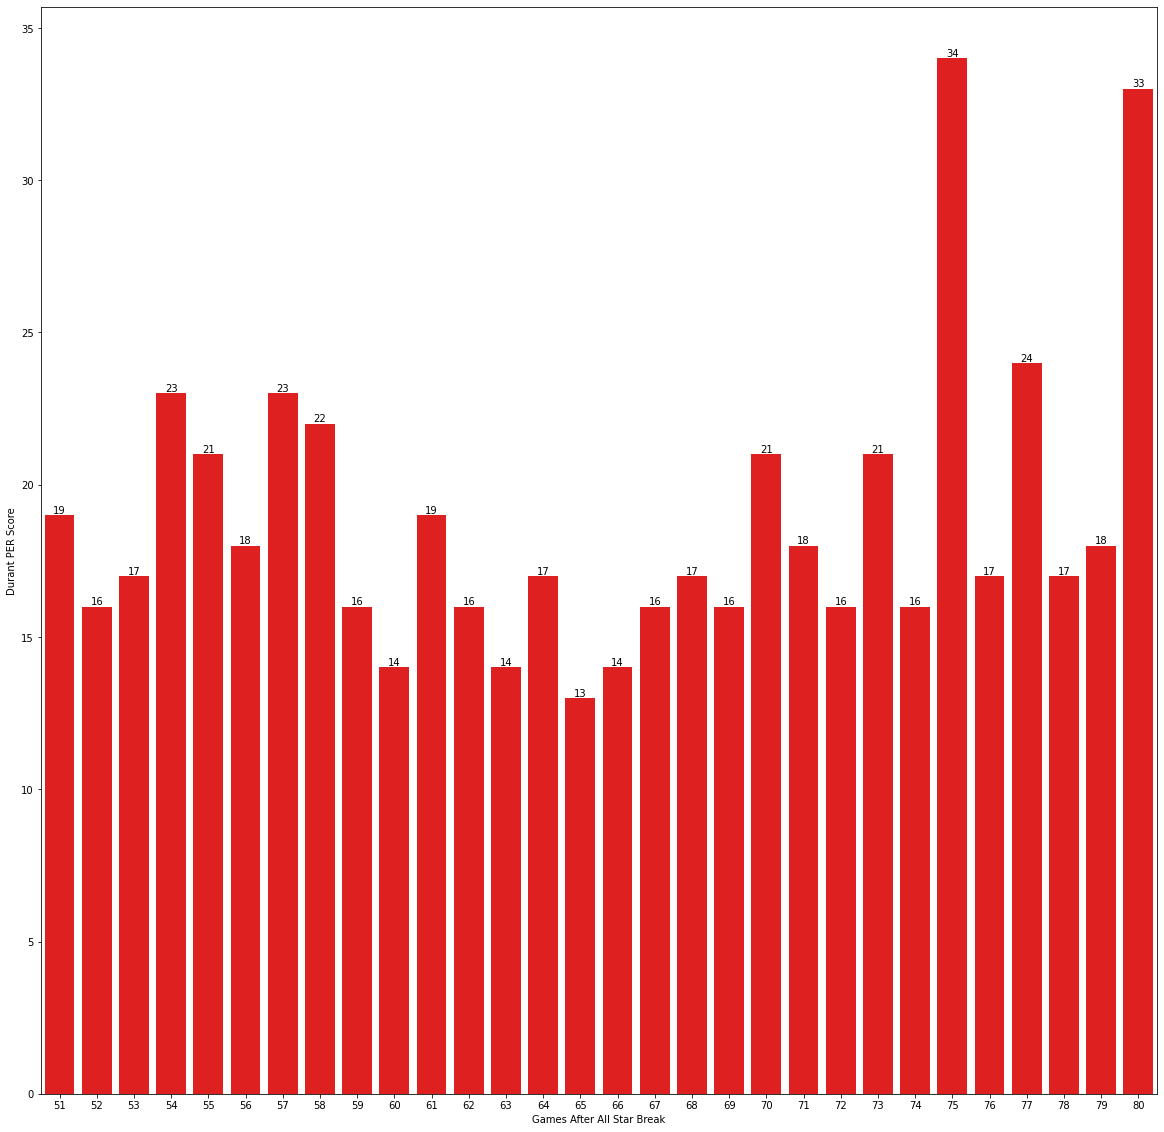

In [764]:

def player_eff_plot_post(header):
    eff40 = raw_eff * 40 
    data['EFF/40'] = eff40.round(decimals=0)
    data['EFF/40'] = pd.to_numeric(data['EFF/40'], errors='coerce')
    post_all_star = data[data['Date'] > '2008-02-16']
    post_All_PTS = post_all_star[header]
    post[header] = post_All_PTS
    games = post_all_star['G']
    # Line Chart
    # return plt.plot(post_All_PTS)
    # Bar Chart 
    # plt.barh(np.arange(len(post_All_PTS)), post_All_PTS)
    bar_plot = data.groupby(by=games).mean()[header] 
    plt.figure(figsize=(20,20))
    graph = sns.barplot(x=bar_plot.index, y=bar_plot, order=games, color='red')
    graph.bar_label(graph.containers[0])
    return graph.set(xlabel='Games After All Star Break', ylabel='Durant PER Score')
player_eff_plot_post('EFF/40')



Choose bar plot to track his daily PER performace for each game he played

In [765]:
def header_sum_pre(header, season):
    pre_allstar_game = data[data['Date'] < '2008-02-16']
    pre_allstar_PTS = pre_allstar_game[header].sum()
    pre[season][header]= pre_allstar_PTS
    return f"Before All Star Break: {pre_allstar_PTS}"
header_sum_pre('FG','2007-08')
header_sum_pre('FGA','2007-08')
header_sum_pre('3P','2007-08')
header_sum_pre('FT','2007-08')
header_sum_pre('FTA','2007-08')
header_sum_pre('TRB','2007-08')
header_sum_pre('AST', '2007-08')
header_sum_pre('STL','2007-08')
header_sum_pre('BLK','2007-08')
header_sum_pre('TOV','2007-08')
header_sum_pre('PTS', '2007-08')
header_sum_pre('PF', '2007-08')
header_sum_pre('ORB', '2007-08')
header_sum_pre('DRB','2007-08')
header_sum_pre('3PA', '2007-08')
header_sum_pre('3PA', '2007-08')
print(pre['2007-08'])

{'FG': 345.0, 'FGA': 858.0, '3P': 48.0, '3PA': 48.0, 'FT': 230.0, 'FTA': 266.0, 'TRB': 205.0, 'AST': 111.0, 'STL': 48.0, 'BLK': 53.0, 'TOV': 139.0, 'PTS': 968.0, 'PF': 71.0, 'ORB': 36.0, 'DRB': 169.0}


In [766]:
def player_eff_pre(header): 
    # Create a paramter (date) that will filter multiple charts by hte date of the all star game 
    #Enter the all-star game date in the format allowed, make if statement to prevent wrong input 
    eff40 = raw_eff * 40 
    data['EFF/40'] = eff40.round(decimals=0)
    data['EFF/40'] = pd.to_numeric(data['EFF/40'], errors='coerce')
    pre_allstar_game = data[data['Date'] < '2008-02-16']
    pre_allstar_PTS = pre_allstar_game[header].mean()
    pre[header] = pre_allstar_PTS
    return f"Before All Star Break: {pre_allstar_PTS}"
print(player_eff_pre('EFF/40'))

Before All Star Break: 18.44


Kevin Durant PER before the All-Star Game was 18.44, which was slighty lower than his performance after the All-Star game.

[Text(0.5, 0, 'Games Before All Star Break'), Text(0, 0.5, 'Durant PER Score')]

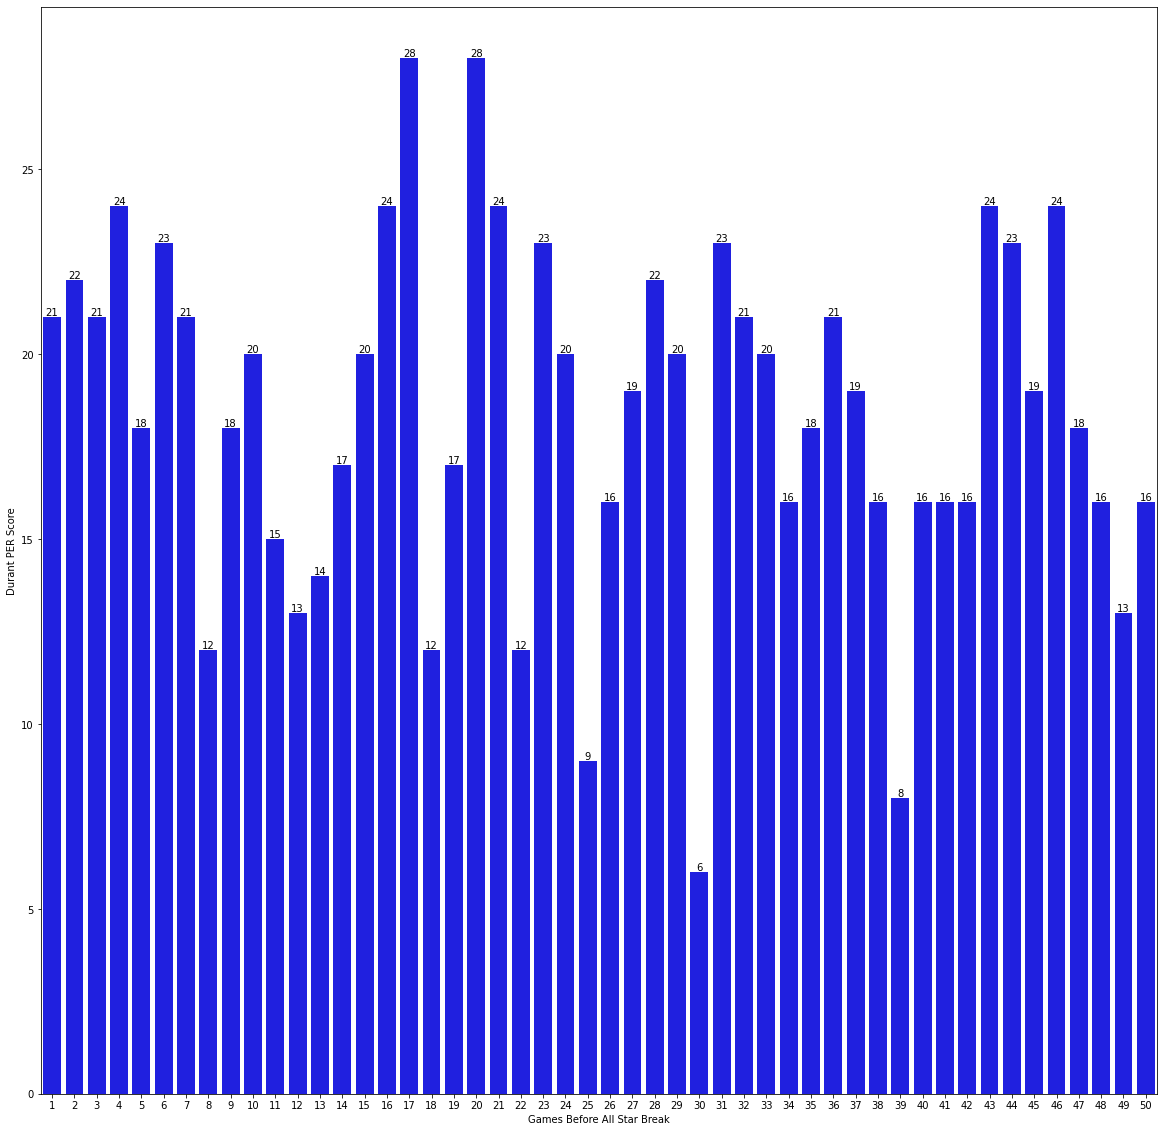

In [767]:
def player_eff_plot_pre(header):
    eff40 = raw_eff * 40 
    data['EFF/40'] = eff40.round(decimals=0)
    data['EFF/40'] = pd.to_numeric(data['EFF/40'], errors='coerce')
    post_all_star = data[data['Date'] < '2008-02-16']
    post_All_PTS = post_all_star[header]
    post[header] = post_All_PTS
    games = post_all_star['G']
    bar_plot = data.groupby(by=games).mean()[header] 
    plt.figure(figsize=(20,20))
    graph = sns.barplot(x=bar_plot.index, y=bar_plot, color='Blue', order=games)
    graph.bar_label(graph.containers[0])
    return graph.set(xlabel='Games Before All Star Break', ylabel='Durant PER Score')
    # Line Chart
    # return plt.plot(post_All_PTS)
    # Bar Chart 
    # plt.barh(np.arange(len(post_All_PTS)), post_All_PTS)
    # plt.hist(data['EFF/40'])
player_eff_plot_pre('EFF/40')

More Exploratory Data Analysis 

In [768]:
points = data['PTS'].mean()
points 

20.3

In [769]:
data['EFF/40'].min()

6.0

In [770]:
data['EFF/40'].max()

34.0

In [771]:
data['EFF/40'].mean()

18.6

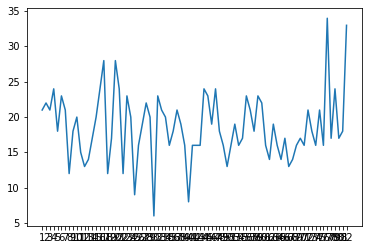

In [772]:

counts = data['EFF/40']
plt.plot(counts)



2009

In [773]:
#Points Before and After The All Star Game
def header_sum_post09(header, season):
    post_all_star = data09[data09['Date'] > '2009-02-14']
    post_All_PTS = post_all_star[header].sum()
    post[season][header] = post_All_PTS
    return f"After All Star Break: {post_All_PTS}"
header_sum_post09('FG', '2008-09')
header_sum_post09('FGA','2008-09')
header_sum_post09('3P', '2008-09')
header_sum_post09('FT','2008-09')
header_sum_post09('FTA','2008-09')
header_sum_post09('TRB','2008-09')
header_sum_post09('AST','2008-09')
header_sum_post09('STL', '2008-09')
header_sum_post09('BLK','2008-09')
header_sum_post09('TOV','2008-09')
header_sum_post09('PTS','2008-09')
header_sum_post09('PF','2008-09')
header_sum_post09('ORB','2008-09')
header_sum_post09('DRB','2008-09')
header_sum_post09('3PA', '2008-09')
header_sum_post09('3PA','2008-09')
print(post['2008-09'])
# print(post)

{'FG': 188.0, 'FGA': 402.0, '3P': 28.0, '3PA': 28.0, 'FT': 139.0, 'FTA': 159.0, 'TRB': 135.0, 'AST': 58.0, 'STL': 32.0, 'BLK': 10.0, 'TOV': 62.0, 'PTS': 543.0, 'PF': 44.0, 'ORB': 22.0, 'DRB': 113.0}


In [774]:
def player_eff_post09(header):
    eff40 = raw_eff * 40 
    data09['EFF/40'] = eff40.round(decimals=0)
    data09['EFF/40'] = pd.to_numeric(data09['EFF/40'], errors='coerce')
    post_all_star = data09[data09['Date'] > '2009-02-14']
    post_All_PTS = post_all_star[header].mean()
    post[header] = post_All_PTS
    return f"After All Star Break: {post_All_PTS}"
print(player_eff_post09('EFF/40'))

After All Star Break: 19.227272727272727


[Text(0.5, 0, 'Games After All Star Break'), Text(0, 0.5, 'Durant PER Score')]

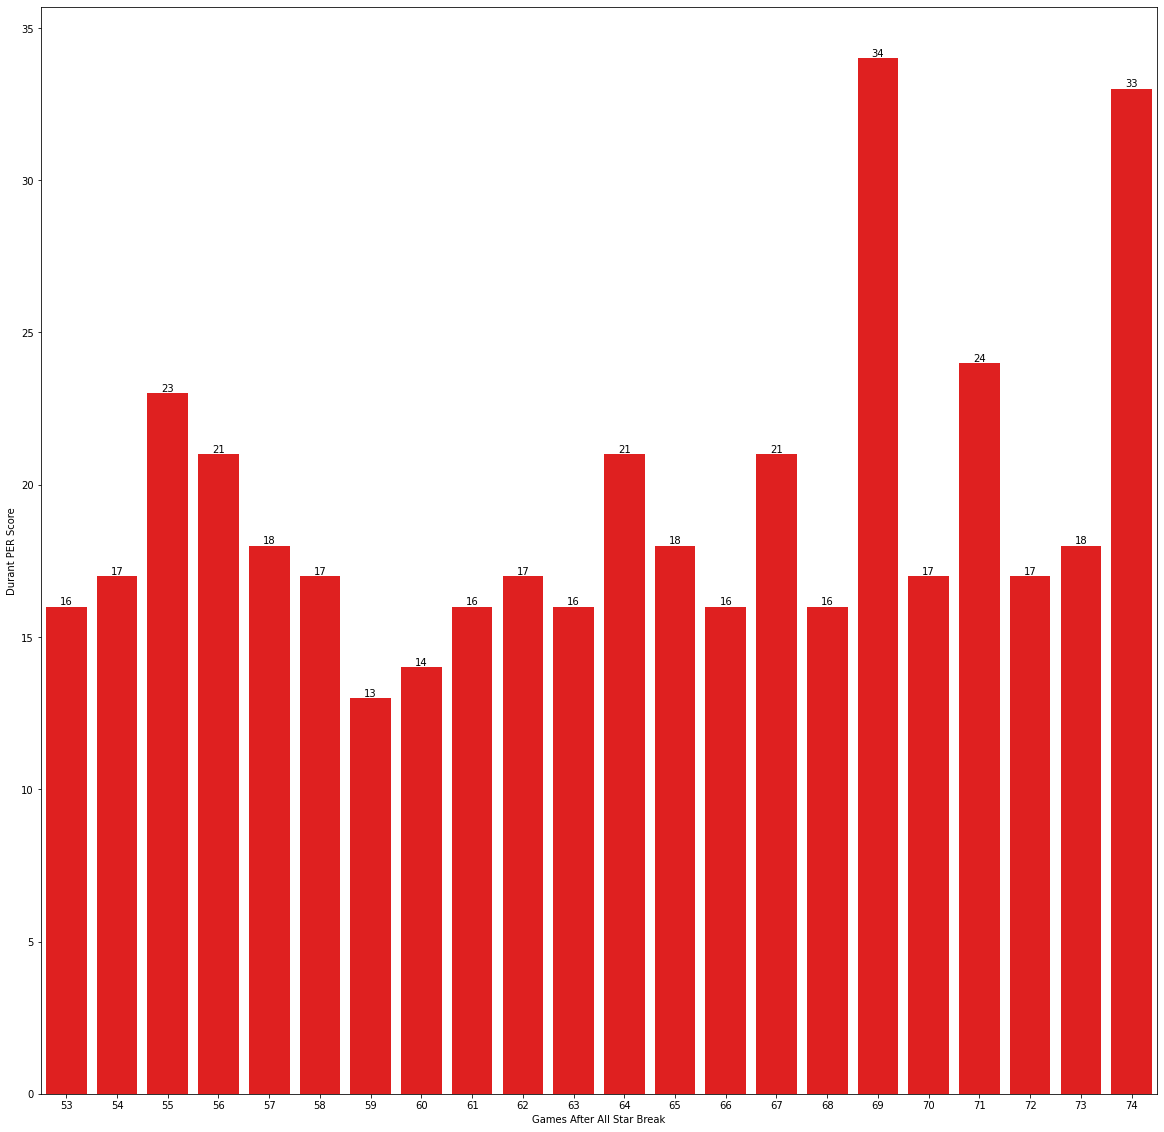

In [775]:
def player_eff_plot_post09(header):
    eff40 = raw_eff * 40 
    data09['EFF/40'] = eff40.round(decimals=0)
    data09['EFF/40'] = pd.to_numeric(data['EFF/40'], errors='coerce')
    post_all_star = data09[data09['Date'] > '2009-02-14']
    post_All_PTS = post_all_star[header]
    post[header] = post_All_PTS
    games = post_all_star['G']
    # Line Chart
    # return plt.plot(post_All_PTS)
    # Bar Chart 
    # plt.barh(np.arange(len(post_All_PTS)), post_All_PTS)
    bar_plot = data09.groupby(by=games).mean()[header] 
    plt.figure(figsize=(20,20))
    graph = sns.barplot(x=bar_plot.index, y=bar_plot, order=games, color='red')
    graph.bar_label(graph.containers[0])
    return graph.set(xlabel='Games After All Star Break', ylabel='Durant PER Score')
player_eff_plot_post09('EFF/40')

In [776]:
def header_sum_pre09(header, season):
    pre_allstar_game = data09[data09['Date'] < '2009-02-14']
    pre_allstar_PTS = pre_allstar_game[header].sum()
    pre[season][header]= pre_allstar_PTS
    return f"Before All Star Break: {pre_allstar_PTS}"
header_sum_pre09('FG', '2008-09')
header_sum_pre09('FGA', '2008-09')
header_sum_pre09('3P','2008-09')
header_sum_pre09('FT','2008-09')
header_sum_pre09('FTA','2008-09')
header_sum_pre09('TRB','2008-09')
header_sum_pre09('AST','2008-09')
header_sum_pre09('STL','2008-09')
header_sum_pre09('BLK','2008-09')
header_sum_pre09('TOV','2008-09')
header_sum_pre09('PTS','2008-09')
header_sum_pre09('PF','2008-09')
header_sum_pre09('ORB','2008-09')
header_sum_pre09('DRB','2008-09')
header_sum_pre09('3PA','2008-09')
header_sum_pre09('3PA','2008-09')
print(pre['2008-09'])
# print(pre)

{'FG': 473.0, 'FGA': 988.0, '3P': 69.0, '3PA': 69.0, 'FT': 313.0, 'FTA': 365.0, 'TRB': 347.0, 'AST': 147.0, 'STL': 64.0, 'BLK': 43.0, 'TOV': 163.0, 'PTS': 1328.0, 'PF': 90.0, 'ORB': 55.0, 'DRB': 292.0}


In [777]:
def player_eff_pre09(header): 
    # Create a paramter (date) that will filter multiple charts by hte date of the all star game 
    #Enter the all-star game date in the format allowed, make if statement to prevent wrong input 
    eff40 = raw_eff * 40 
    data09['EFF/40'] = eff40.round(decimals=0)
    data09['EFF/40'] = pd.to_numeric(data09['EFF/40'], errors='coerce')
    pre_allstar_game = data09[data09['Date'] < '2009-02-14']
    pre_allstar_PTS = pre_allstar_game[header].mean()
    pre[header] = pre_allstar_PTS
    return f"Before All Star Break: {pre_allstar_PTS}"
print(player_eff_pre09('EFF/40'))

Before All Star Break: 18.58


[Text(0.5, 0, 'Games Before All Star Break'), Text(0, 0.5, 'Durant PER Score')]

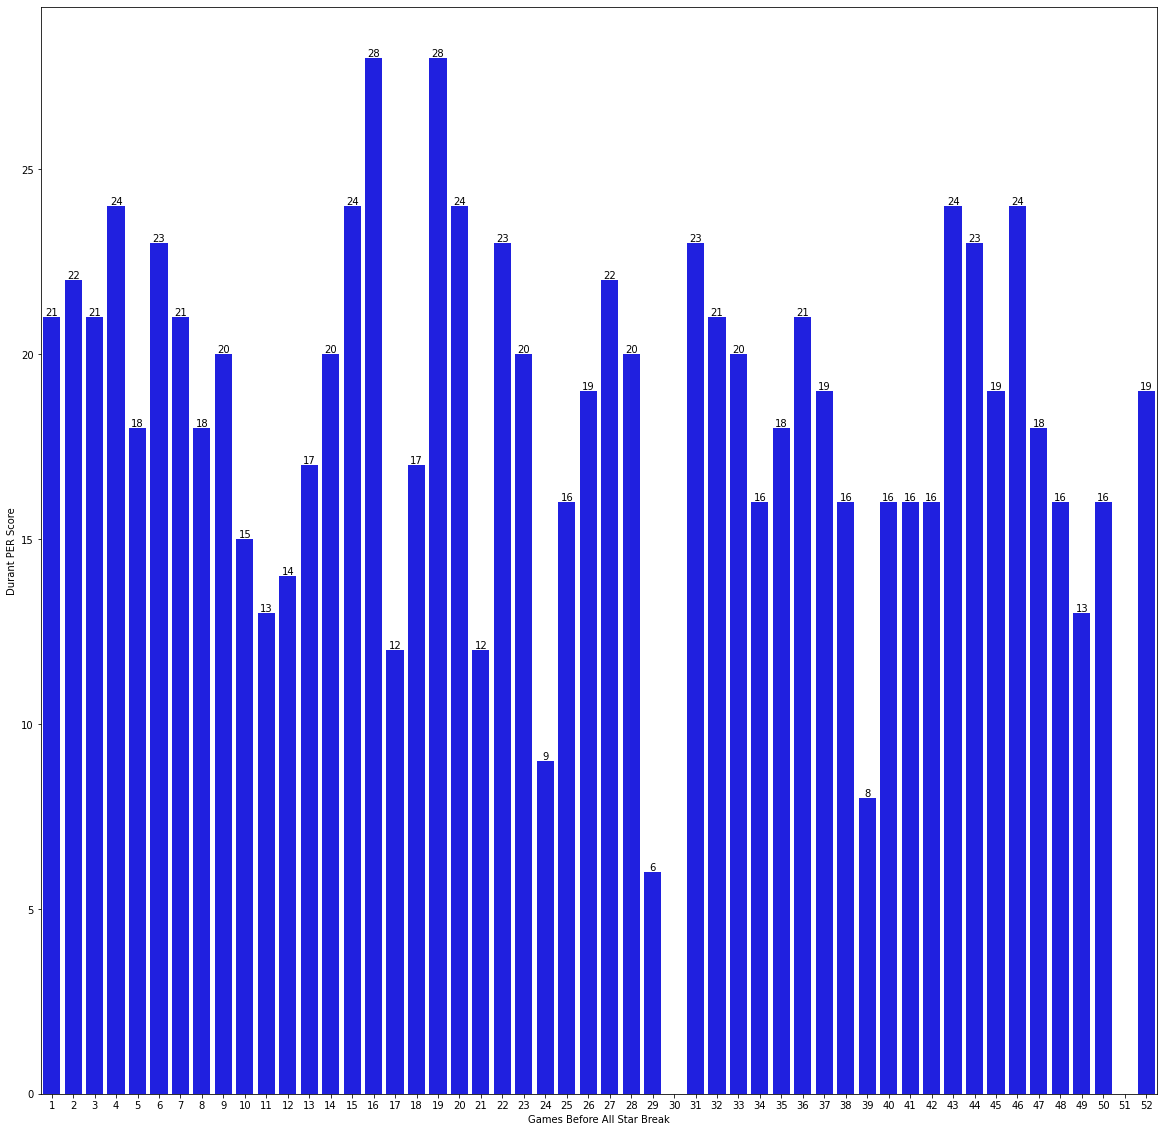

In [778]:
def player_eff_plot_pre09(header):
    eff40 = raw_eff * 40 
    data09['EFF/40'] = eff40.round(decimals=0)
    data09['EFF/40'] = pd.to_numeric(data09['EFF/40'], errors='coerce')
    post_all_star = data09[data09['Date'] < '2009-02-14']
    post_All_PTS = post_all_star[header]
    post[header] = post_All_PTS
    games = post_all_star['G']
    bar_plot = data09.groupby(by=games).mean()[header] 
    plt.figure(figsize=(20,20))
    graph = sns.barplot(x=bar_plot.index, y=bar_plot, color='Blue', order=games)
    graph.bar_label(graph.containers[0])
    return graph.set(xlabel='Games Before All Star Break', ylabel='Durant PER Score')
    # Line Chart
    # return plt.plot(post_All_PTS)
    # Bar Chart 
    # plt.barh(np.arange(len(post_All_PTS)), post_All_PTS)
    # plt.hist(data['EFF/40'])
player_eff_plot_pre09('EFF/40')

Conclusion 
Using Kevin Durant's rookie and sophmore year stats, Kevin Durant performs slighty more efficent after the All-Star break compared to before. I would conclude that Kevin Durant is a player that could help a NBA team make a late playoff run from these tow data sources. Kevin Durant scores PER above the NBA league average of 15 

In [779]:


pre_data = pd.DataFrame(pre)
post_data = pd.DataFrame(post)


[Text(0.5, 0, 'Games'), Text(0, 0.5, 'Player Effiency Per 40')]

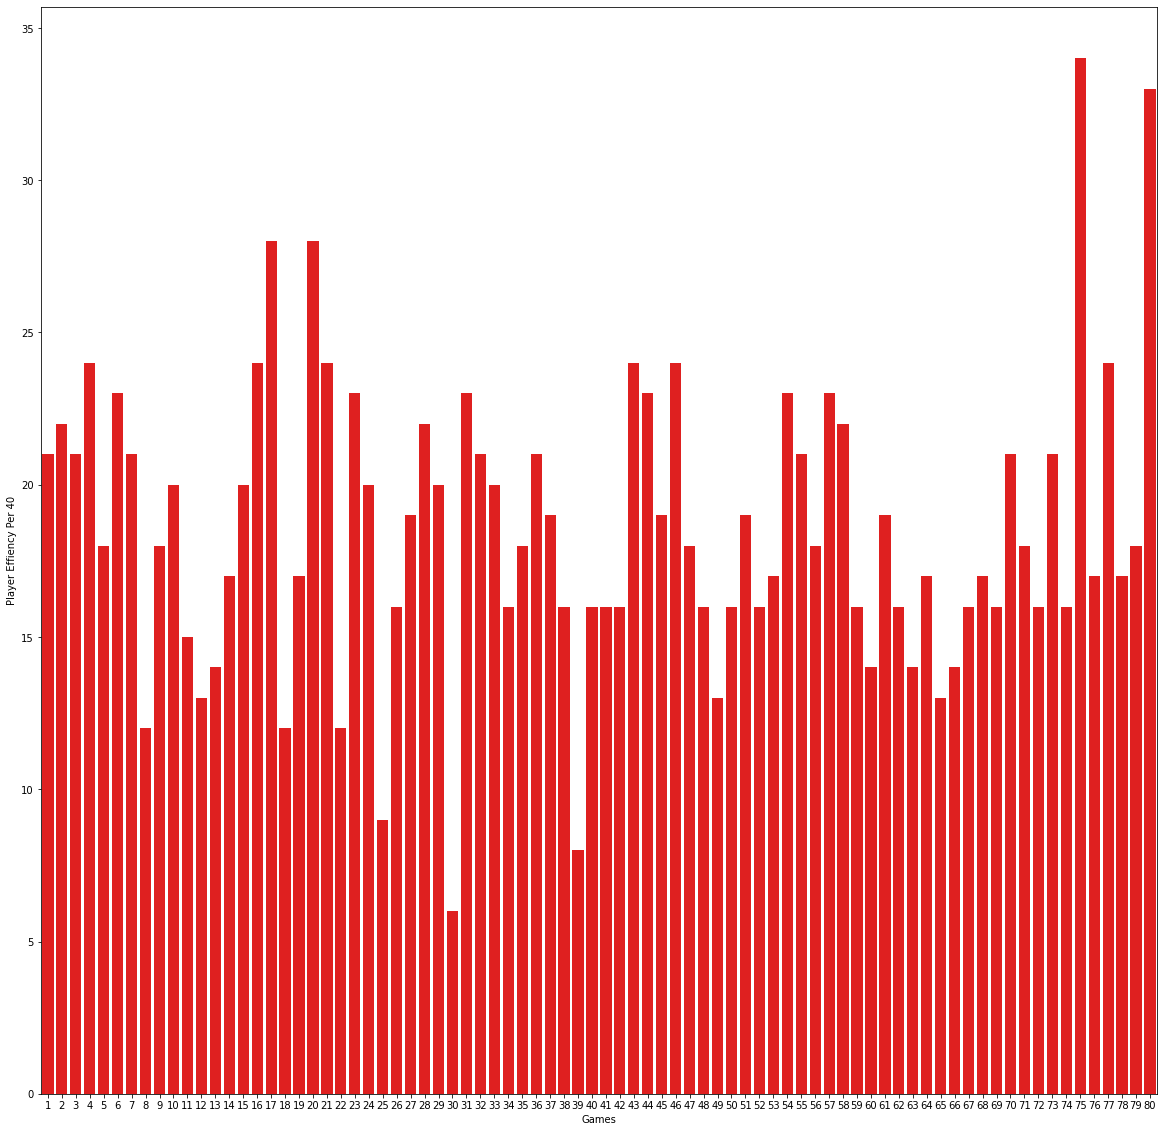

In [780]:
#Overall Seaon 
bar_data = data.groupby(['G']).mean()['EFF/40']
plt.figure(figsize=(20,20))
graph = sns.barplot(x=bar_data.index, y=bar_data, order=data['G'], color='red')
graph.set(xlabel='Games', ylabel='Player Effiency Per 40')